 ## $$Foundational Simulations of Macroscopic Quantum tunneling$$

#  1. Introduction: Macroscopic Quantum Tunneling in Josephson Junctions

Imagine a **quantum particle** the size of a circuit — a macroscopic object — slipping through an **energy barrier** it classically shouldn’t be able to cross.  
That’s the essence of **Macroscopic Quantum Tunneling (MQT)** — where the **phase difference** across a **Josephson junction** tunnels through the potential barrier instead of climbing over it via thermal activation.

In a **current-biased Josephson junction (JJ)**, the potential energy landscape resembles a **tilted washboard** —  
a rolling surface of peaks and valleys. The “phase particle” can be trapped in one of these wells, oscillating quietly,  
until a slight push (thermal energy) or a purely **quantum leap** allows it to escape — initiating a measurable voltage switch.

---

###  Why It Matters

- **MQT is the heartbeat of superconducting qubits**, shaping both their **readout fidelity** and **decoherence times**.  
- It provides a striking demonstration of **quantum mechanics at a macroscopic scale**, bridging the mysterious gap between the microscopic and the everyday world.  
- The **switching dynamics** of Josephson junctions lie at the core of **SQUIDs** (*Superconducting Quantum Interference Devices*),  
  which detect **magnetic flux changes** smaller than a millionth of a flux quantum.  
- By understanding **escape dynamics** — both thermal and quantum — we gain deep insight into the **stability**, **sensitivity**, and **quantum behavior** of superconducting circuits.

---

###  What we have shown in This Notebook

  

we have:
- Modelled the **washboard potential** and visualized its shape as the current bias tilts it.  
- Derived and simulated key quantities:
 - **Barrier height** $( \Delta U )$
 - **Plasma frequency** $( \omega_p )$
  - **Thermal and quantum escape rates**
   - **Average escape time**
   - **Switching probability (S-curve)**
   - **Crossover temperature $( T^* )$**
  


---

 *By the end of this exploration, you’ll see how Josephson junctions — tiny superconducting bridges — become windows into macroscopic quantum reality,  and how this phenomenon underpins the operation of modern superconducting quantum technologies.*


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.sparse as sp
import scipy.sparse.linalg as spla

##  Quantum Tunneling in a Tilted Washboard Potential

In this section, we numerically simulate **quantum tunneling of the phase particle** in a **tilted washboard potential**,  which models the dynamics of a **current-biased Josephson junction**.

---

###  Physical Background

The dynamics of the **phase particle** $( \phi )$ in a current-biased Josephson junction with bias current $( I_b )$ are governed by the **washboard potential**:

$$
U(\phi) = -E_J \cos(\phi) - \frac{\hbar I_b}{2e}\,\phi
$$

where  

- $( E_J = \frac{\hbar I_c}{2e} )$ is the **Josephson energy**,  
- $( I_b )$ is the **applied bias current**,  
- $( I_c )$ is the **critical current** of the junction,  
- ( e ) is the **elementary charge**, and  
- $( \hbar )$ is the **reduced Planck constant**.

For $( I_b < I_c )$, the potential exhibits **metastable wells** separated by barriers.  
Even when the particle’s energy is below the barrier height, **quantum tunneling** allows it to escape —  
a purely quantum effect with **no classical counterpart**.

---

###  Simulation Setup

We solve the **time-dependent Schrödinger equation**:

$$
i\hbar\,\frac{\partial \psi(\phi, t)}{\partial t}
=
\left[
-\frac{\hbar^2}{2m}\,\frac{\partial^2}{\partial \phi^2}
+ U(\phi)
\right]\psi(\phi, t)
$$

where \( m \) represents the **effective mass** of the phase particle.

#### Numerical Scheme:
- Spatial domain: $( \phi \in [-10,\, 10] )$ (discretized on a uniform grid)  
- Initial state: **Gaussian wavepacket** centered near the potential minimum, close to the barrier top  
- Time evolution: Implemented via the **Crank–Nicolson** method for stable, **unitary evolution**

---

###  Observations

1. **Probability Density Evolution**  
   The first plot shows $( |\psi(\phi, t)|^2 )$ as a function of $( \phi )$ and time \( t \).  
   As time progresses, the wavefunction partially leaks through and beyond the barrier —  
   this leakage represents **quantum tunneling** of the macroscopic phase particle.

2. **Escape Probability**  
   The second plot tracks the **escape probability**, defined as the integrated probability density beyond a chosen threshold (e.g., $( \phi > 0.5 )$):

   $$
   P_{\text{escape}}(t) = \int_{0.5}^{\infty} |\psi(\phi, t)|^2\, d\phi
   $$

   This probability **increases with time**, signifying repeated tunneling events from the metastable well.

---

###  Interpretation

The **tunneling probability** increases for:

- Smaller effective mass \( m \)
- Higher bias currents $( I_b \approx I_c $)
- Shallower potential barriers (lower $( E_J )$)

These conditions correspond to **enhanced quantum behavior**, where the phase particle more readily tunnels through the barrier.

---

 *This simulation directly visualizes macroscopic quantum tunneling (MQT) in a Josephson junction —  
a foundational process underlying qubit switching, quantum readout mechanisms, and the quantum–classical crossover in superconducting circuits.*


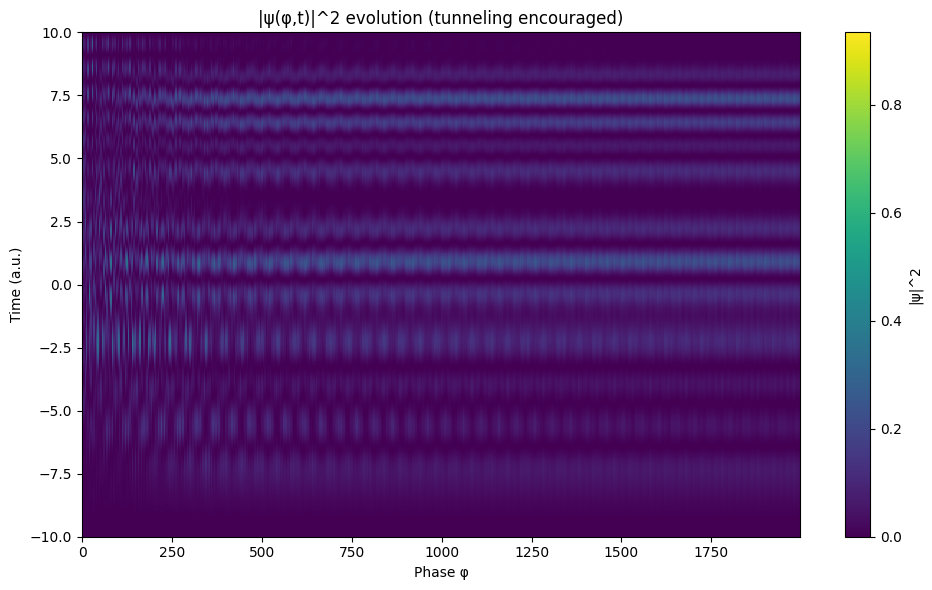

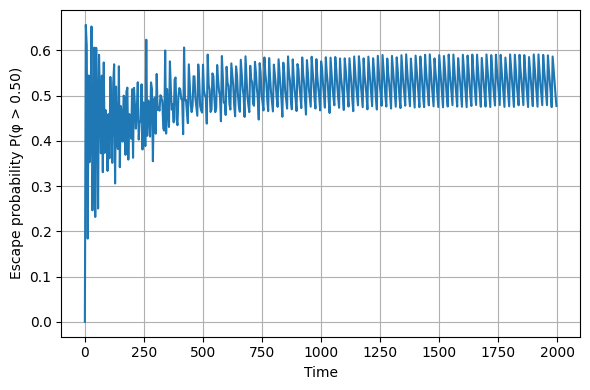

In [ ]:
hbar = 1.0
# Effective mass (smaller -> more tunneling)
m = 0.5          # try 0.1..1.0 (reduce to increase tunneling)
# Josephson energy scale (barrier height)
EJ = 1.0         # try 0.2..1.0 (reduce to lower barrier)
# Bias current as fraction of Ic (tilt). Try 0.8..0.99 to encourage escape.
I_over_Ic = 0.95

# Spatial grid in phase phi
phi_min, phi_max = -10.0, 10.0
N = 2048
phi = np.linspace(phi_min, phi_max, N)
dphi = phi[1]-phi[0]

# Potential: tilted washboard
U = -EJ * np.cos(phi) - (I_over_Ic * EJ) * phi

# Initial state: Gaussian localized near the well but shifted toward barrier
phi0 = -2.0        # center (move toward right barrier, e.g., -1..0)
sigma = 0.6        # width
k0 = 0.0           # initial momentum
psi0 = (1/(sigma*np.sqrt(np.pi)))**0.5 * np.exp(-(phi-phi0)**2/(2*sigma**2) + 1j*k0*phi)
# normalize
psi0 /= np.sqrt(np.sum(np.abs(psi0)**2)*dphi)

# Time stepping
dt = 0.02         # reduce dt if unstable
tmax = 2000.0     # increase to watch rarer tunneling events
nsteps = int(tmax/dt)

# Build kinetic operator (second derivative) with finite differences
diag = np.ones(N)*(-2.0)
off = np.ones(N-1)
Lap = (np.diag(diag) + np.diag(off,1) + np.diag(off,-1)) / (dphi**2)
# Make sparse
Lap = sp.csr_matrix(Lap)

# Hamiltonian H = - (hbar^2 / (2m)) Lap + diag(U)
Tcoeff = - (hbar**2) / (2.0*m)
H = Tcoeff * Lap + sp.diags(U, 0)

# Crank-Nicolson matrices: (I + i dt H / 2) psi_{n+1} = (I - i dt H/2) psi_n
I = sp.identity(N, format='csr')
A = I + 1j * dt * H / 2.0
B = I - 1j * dt * H / 2.0
# Use sparse factorization for speed
factor = spla.factorized(A.tocsc())

psi = psi0.copy()

# Choose a barrier location (right of well). Measure escape as probability for phi > phi_escape
phi_escape = 0.5  # adjust to be at/near barrier top or just to the right
escape_mask = phi > phi_escape

# For plotting: store snapshots at intervals
snap_interval = max(1, nsteps//500)
times = []
escape_prob = []
snapshots = []

for n in range(nsteps):
    b = B.dot(psi)
    psi = factor(b)           # solve A psi_{n+1} = b
    # renormalize occasionally to avoid numeric drift
    if n % 1000 == 0:
        psi /= np.sqrt(np.sum(np.abs(psi)**2)*dphi)
    if n % snap_interval == 0:
        t = n*dt
        times.append(t)
        P_escape = np.sum(np.abs(psi[escape_mask])**2) * dphi
        escape_prob.append(P_escape)
        snapshots.append(np.abs(psi)**2)

    if n % 50 == 0:
        # gaussian absorber near boundaries
        width = 1.5
        left_abs = np.exp(-((phi - phi_min)/width)**2)
        right_abs = np.exp(-((phi - phi_max)/width)**2)
        absorber = 1.0 - 0.2*(left_abs + right_abs)
        psi *= absorber


snapshots = np.array(snapshots)
T,X = np.meshgrid(phi, times)
plt.figure(figsize=(10,6))
plt.pcolormesh(X, T, snapshots, shading='auto')
plt.xlabel('Phase φ')
plt.ylabel('Time (a.u.)')
plt.title('|ψ(φ,t)|^2 evolution (tunneling encouraged)')
plt.colorbar(label='|ψ|^2')
plt.tight_layout()
plt.show()

plt.figure(figsize=(6,4))
plt.plot(times, escape_prob)
plt.xlabel('Time')
plt.ylabel('Escape probability P(φ > {:.2f})'.format(phi_escape))
plt.grid(True)
plt.tight_layout()
plt.show()


##  Constants

These are fundamental constants used throughout the **Josephson junction simulation**:

$$
\Phi_0 = 2.068 \times 10^{-15}\ \text{Wb} \quad (\text{Magnetic flux quantum})
$$

$$
k_B = 1.381 \times 10^{-23}\ \text{J/K} \quad (\text{Boltzmann constant})
$$

$$
\hbar = 1.055 \times 10^{-34}\ \text{J·s} \quad (\text{Reduced Planck constant})
$$

---

##  Device Parameters

$$
I_{c0} = 9.489\ \mu\text{A} \quad (\text{Critical current at zero flux})
$$

$$
C = 6.35\ \text{pF} \quad (\text{Junction capacitance})
$$

---

##  Barrier Height  $\Delta U$

Define the normalized bias $$ ( s = I_b / I_c ) $$  
With the Josephson energy $$( E_J = \dfrac{I_c \Phi_0}{2\pi} ),$$ the **exact barrier height** between the local minimum and the nearest maximum of the tilted washboard potential is:

$$
\Delta U(s) = 2E_J\Big[\sqrt{1 - s^2} - s\cos^{-1}(s)\Big]
$$

For $( s )$ close to 1 (i.e. $( I_b )$ near $( I_c ))$, the **approximate expression** is:

$$
\Delta U(s) \approx \frac{4\sqrt{2}}{3} E_J (1 - s)^{3/2}
$$

This barrier height decreases as the bias current $( I_b )$ approaches the critical current $( I_c )$.

---

##  Plasma Frequency  $\omega_p$

The **zero-bias plasma frequency** is:

$$
\omega_{p0} = \sqrt{\frac{2\pi I_c}{\Phi_0\,C}}
$$

The **plasma frequency at finite bias** $( I_b )$ (with $( s = I_b / I_c ))$ is:

$$
\omega_p(I_b, I_c) = \omega_{p0} \left(1 - s^2\right)^{1/4}
$$


In [ ]:
Phi0 = 2.067833848e-15   # Magnetic flux quantum [Wb]
kB = 1.380649e-23         # Boltzmann constant [J/K]
hbar = 1.0545718e-34      # Reduced Planck constant [J*s]
Ic0 = 9.489e-6            # Critical current [A]
C = 6.35e-12              # Capacitance [F]

def deltaU(Ib, Ic):
    x = Ib / Ic
    x = np.minimum(x, 0.999)
    return 2 * (Ic * Phi0 / (2 * np.pi)) * (1 - x)**1.5

def omega_p(Ib, Ic):
    wp0 = np.sqrt(2 * np.pi * Ic / (C * Phi0))
    factor = np.maximum(1 - (Ib/Ic)**2, 1e-6)
    return wp0 * factor**0.25

def gamma_th(Ib, T, Ic):
    DU = deltaU(Ib, Ic)
    wp = omega_p(Ib, Ic)
    return (wp / (2 * np.pi)) * np.exp(-DU / (kB * T))

def gamma_q(Ib, Ic):
    DU = deltaU(Ib, Ic)
    wp = omega_p(Ib, Ic)
    if wp == 0: return 0
    prefactor = np.sqrt(864 * np.pi * DU / (hbar * wp))
    exponent = -36 * DU / (5 * hbar * wp)
    return (wp / (2 * np.pi)) * prefactor * np.exp(exponent)

##  Switching Probability vs Bias Current — Temperature Dependence

This plot shows **S-curves**, representing the **switching probability** of a Josephson junction as a function of the **bias current** $( I_b )$, for various temperatures $( T = 20,\ 100,\ 300\ \text{mK} )$.

---

###  Mathematical Formulation

The **switching probability** $( P_{\mathrm{sw}}(I_b) )$ is computed from the **escape rate** using:

$$
P_{\mathrm{sw}}(I_b) = 1 - \exp\!\left[- \int \Gamma(I_b)\, \alpha\, dI \right]
$$

where  
- $( \Gamma(I_b) = \Gamma_{\mathrm{th}} + \Gamma_{\mathrm{q}} )$ is the **total escape rate** (thermal + quantum),  
- $( \alpha )$ is the **current sweep rate**, typically in units of A/s.  

---

###  Escape Rates

**Thermal activation rate:**

$$
\Gamma_{\mathrm{th}} \propto \omega_p \exp\!\left(-\frac{\Delta U}{k_B T}\right)
$$

**Quantum tunneling rate:**

$$
\Gamma_{\mathrm{q}} \propto \omega_p \exp\!\left(-\frac{36\,\Delta U}{5\,\hbar \omega_p}\right)
$$

---

###  Temperature Dependence

- As the **temperature increases**, the **thermal activation rate** $( \Gamma_{\mathrm{th}} )$ **increases**, leading to more frequent escape events.  
- This shifts the **S-curve leftward**, meaning switching occurs at **lower bias currents**.  
- The curve also becomes **broader**, indicating greater **stochastic variability** in switching.

 **Interpretation:**  
Higher temperatures increase thermal fluctuations, enabling the phase particle to **escape earlier** and with more **statistical spread**, leading to a softer, more gradual S-curve.

---

##  Switching Probability vs Bias Current — Flux Tunability via SQUID

In a **SQUID**, the **effective critical current** depends on the applied magnetic flux $( \Phi_{\mathrm{ext}} )$, modulating the barrier height dynamically.

$$
I_{c,\mathrm{eff}}(\Phi_{\mathrm{ext}}) = 2 I_c \left| \cos\!\left( \frac{\pi \Phi_{\mathrm{ext}}}{\Phi_0} \right) \right|
$$

where  
- $( \Phi_0 )$ — magnetic flux quantum,  
- $( \Phi_{\mathrm{ext}} \in [0,\, 0.49\,\Phi_0] )$ — externally applied magnetic flux.

---

###  Observations

- Increasing $( \Phi_{\mathrm{ext}} )$ **reduces** the effective critical current $( I_c )$.  
- Consequently, the **S-curves shift leftward** with increasing flux — meaning **lower bias currents** trigger switching.  
- This provides **magnetic tunability** over the **switching dynamics**, effectively controlling when and how the phase particle escapes.

---

###  Conceptual Insight

The **SQUID** behaves as a **flux-tunable Josephson junction**.  
By modulating the applied flux, one can reshape the **tilted washboard potential**,  
adjusting both the **barrier height** $( \Delta U )$ and the **escape dynamics**.  

This enables **external control** over **quantum tunneling behavior**,  
forming the basis for **flux qubits**, **tunable quantum detectors**, and **superconducting logic elements**.


--- Macroscopic Quantum Tunneling Simulation ---
Estimated crossover temperature T* ≈ 45.77 mK


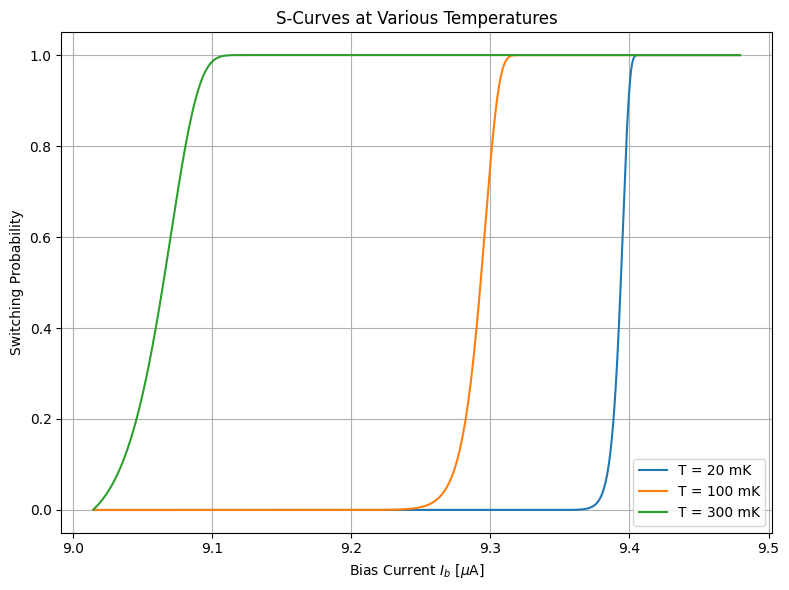

Flux = 0.00e+00 → Ic_eff = 1.90e-05 A
Ib = 18.03 μA, Psw = 1.79e-10
Ib = 18.17 μA, Psw = 4.93e-06
Ib = 18.31 μA, Psw = 3.66e-03
Ib = 18.45 μA, Psw = 7.61e-01
Ib = 18.59 μA, Psw = 1.00e+00
Ib = 18.73 μA, Psw = 1.00e+00
Ib = 18.87 μA, Psw = 1.00e+00
Flux = 5.17e-16 → Ic_eff = 1.34e-05 A
Ib = 12.75 μA, Psw = 2.07e-06
Ib = 12.85 μA, Psw = 9.71e-03
Ib = 12.95 μA, Psw = 6.56e-01
Ib = 13.04 μA, Psw = 1.00e+00
Ib = 13.14 μA, Psw = 1.00e+00
Ib = 13.24 μA, Psw = 1.00e+00
Ib = 13.34 μA, Psw = 1.00e+00
Flux = 9.31e-16 → Ic_eff = 2.97e-06 A
Ib = 2.82 μA, Psw = 1.00e+00
Ib = 2.84 μA, Psw = 1.00e+00
Ib = 2.86 μA, Psw = 1.00e+00
Ib = 2.89 μA, Psw = 1.00e+00
Ib = 2.91 μA, Psw = 1.00e+00
Ib = 2.93 μA, Psw = 1.00e+00
Ib = 2.95 μA, Psw = 1.00e+00
Flux = 1.01e-15 → Ic_eff = 5.96e-07 A
Ib = 0.57 μA, Psw = 1.00e+00
Ib = 0.57 μA, Psw = 1.00e+00
Ib = 0.58 μA, Psw = 1.00e+00
Ib = 0.58 μA, Psw = 1.00e+00
Ib = 0.58 μA, Psw = 1.00e+00
Ib = 0.59 μA, Psw = 1.00e+00
Ib = 0.59 μA, Psw = 1.00e+00


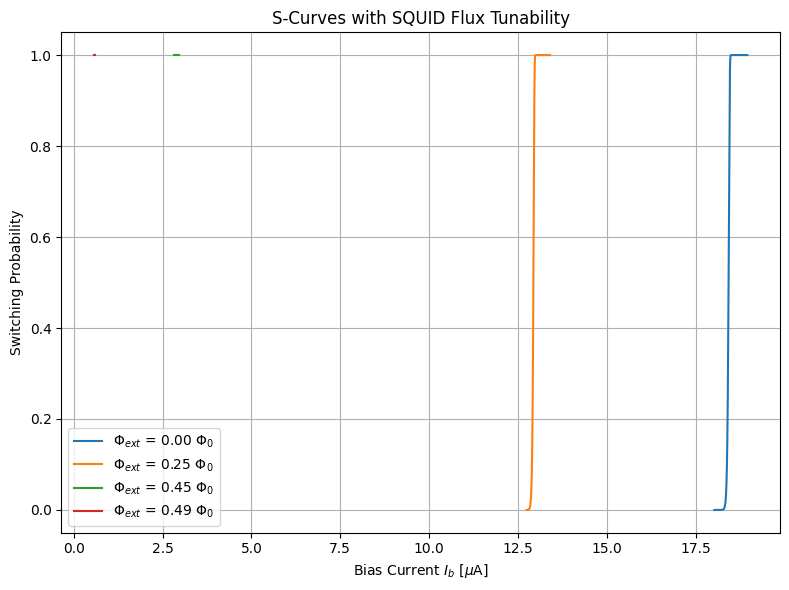

In [ ]:
def compute_switching_curve(T, Ic_eff):
    Ib_max = 0.999 * Ic_eff  # keep Ib below Ic
    Ib_array = np.linspace(0.95 * Ic_eff, Ib_max, 1000)
    S = 1.0
    Psw = []
    for i, Ib in enumerate(Ib_array):
        dI = Ib_array[1] - Ib_array[0]
        rate = gamma_th(Ib, T, Ic_eff) + gamma_q(Ib, Ic_eff)
        S *= np.exp(-rate * dI / alpha)
        Psw.append(1 - S)
    return Ib_array, np.array(Psw)



def plot_scurves_temperatures():
    temperatures = [0.02, 0.1, 0.3]  # Kelvin
    plt.figure(figsize=(8,6))
    for T in temperatures:
        Ib_array, P = compute_switching_curve(T, Ic0)
        plt.plot(Ib_array * 1e6, P, label=fr"T = {T*1e3:.0f} mK")

    plt.xlabel(r"Bias Current $I_b$ [$\mu$A]")
    plt.ylabel("Switching Probability")
    plt.title("S-Curves at Various Temperatures")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()



def Ic_flux(Phi_ext):
    return 2 * Ic0 * np.abs(np.cos(np.pi * Phi_ext / Phi0))

def plot_scurves_flux_modulation():
    flux_vals = [0.0, 0.25 * Phi0, 0.45 * Phi0, 0.49 * Phi0]
    T_fixed = 0.3  # Higher T to see thermal switching
    plt.figure(figsize=(8,6))
    for Phi in flux_vals:
        Ic_mod = Ic_flux(Phi)
        print(f"Flux = {Phi:.2e} → Ic_eff = {Ic_mod:.2e} A")
        Ib_array, P = compute_switching_curve(T_fixed, Ic_mod)
        for Ib, p in zip(Ib_array[::150], P[::150]):
            print(f"Ib = {Ib*1e6:.2f} μA, Psw = {p:.2e}")
        plt.plot(Ib_array * 1e6, P, label=fr"$\Phi_{{ext}}$ = {Phi/Phi0:.2f} $\Phi_0$")

    plt.xlabel(r"Bias Current $I_b$ [$\mu$A]")
    plt.ylabel("Switching Probability")
    plt.title("S-Curves with SQUID Flux Tunability")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()



def estimate_Tcrossover():
    Ib_mid = 0.95 * Ic0
    wp = omega_p(Ib_mid, Ic0)
    T_star = hbar * wp / (2 * np.pi * kB)
    print(f"Estimated crossover temperature T* ≈ {T_star*1e3:.2f} mK")


if __name__ == "__main__":
    print("--- Macroscopic Quantum Tunneling Simulation ---")
    estimate_Tcrossover()
    plot_scurves_temperatures()
    plot_scurves_flux_modulation()


##  Escape Mechanisms in a Josephson Junction

The escape of the **phase particle** from the tilted washboard potential in a Josephson junction can occur via two primary mechanisms:

---

### - Thermal Activation (Kramers Escape)

Dominates at **higher temperatures** and follows an **Arrhenius-like** formula:

$$
\gamma_{\mathrm{th}}(I_b, T) = \frac{\omega_p}{2\pi}
\exp\!\left(-\frac{\Delta U(I_b)}{k_B T}\right)
$$

where  
- $( \omega_p )$ — plasma frequency  
- $( \Delta U(I_b) )$ — energy barrier (bias-dependent)  
- $( k_B )$ — Boltzmann constant  
- $( T )$ — temperature  

---

### - Macroscopic Quantum Tunneling (MQT)

Dominates at **low temperatures**, when **quantum tunneling** through the potential barrier becomes more probable:

$$
\gamma_{\mathrm{q}}(I_b) =
\frac{\omega_p}{2\pi}
\sqrt{\frac{864\pi\,\Delta U}{\hbar \omega_p}}
\exp\!\left(-\frac{36\,\Delta U}{5\,\hbar \omega_p}\right)
$$

where  
- $( \hbar )$ — reduced Planck constant  
- $( \omega_p )$ — plasma frequency  
- $( \Delta U )$ — energy barrier  

---

##  Observations from the Plot

The **escape rate vs. bias current** is typically plotted for three representative temperatures:  
**20 mK**, **100 mK**, and **300 mK**.

- For each temperature, **thermal** (solid lines) and **quantum** (dashed lines) escape rates are shown.  
- As the bias current $( I_b )$ increases, the energy barrier $( \Delta U )$ decreases, leading to a **sharp rise** in escape rates.  
- At **low temperatures (20 mK)**, the **quantum tunneling** rate dominates since the thermal rate is exponentially suppressed.  
- At **higher temperatures (100 mK and 300 mK)**, **thermal activation** becomes dominant as thermal energy helps overcome the barrier.  
- The **crossover point**, where thermal and quantum escape rates are comparable, marks the **quantum-to-classical transition** regime.

---

 *This dual-escape behavior is a hallmark of the Josephson junction’s rich dynamics, bridging classical thermal activation and quantum tunneling phenomena.*


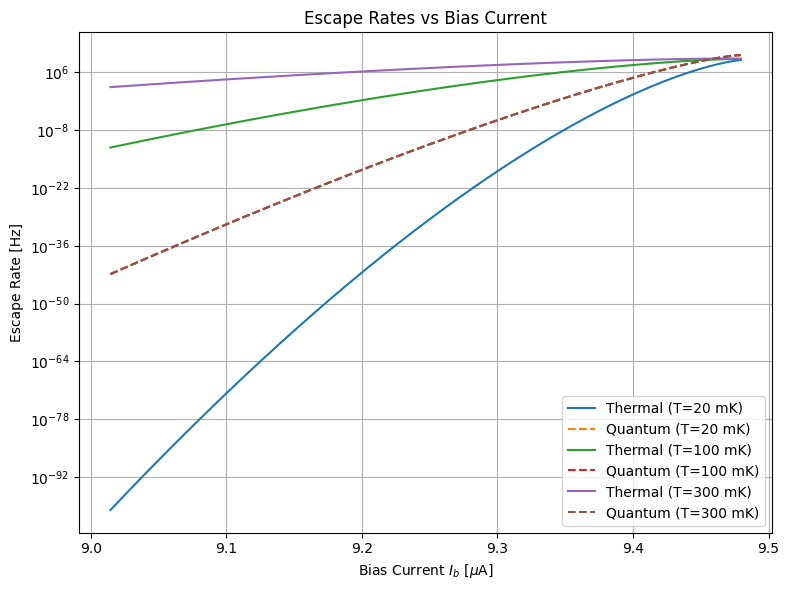

In [ ]:
Ib_vals = np.linspace(0.95 * Ic0, 0.999 * Ic0, 300)
T_vals = [0.02, 0.1, 0.3]  # Kelvin

plt.figure(figsize=(8,6))
for T in T_vals:
    g_th = [gamma_th(Ib, T, Ic0) for Ib in Ib_vals]
    g_q = [gamma_q(Ib, Ic0) for Ib in Ib_vals]
    plt.plot(Ib_vals*1e6, g_th, label=f'Thermal (T={T*1e3:.0f} mK)')
    plt.plot(Ib_vals*1e6, g_q, '--', label=f'Quantum (T={T*1e3:.0f} mK)')
plt.yscale('log')
plt.xlabel("Bias Current $I_b$ [$\\mu$A]")
plt.ylabel("Escape Rate [Hz]")
plt.title("Escape Rates vs Bias Current")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## Barrier Height $( \Delta U )$ of the Washboard Potential

In the **tilted washboard potential** that models a current-biased Josephson junction,  
the **barrier height** $( \Delta U )$ represents the **energy** the phase particle must overcome —  
either through **thermal activation** or **quantum tunneling** — to escape from a **metastable potential well**.

---

###  Mathematical Expression

The barrier height as a function of bias current $( I_b )$ and critical current $( I_c )$ is given by:

$$
\Delta U(I_b, I_c) = \frac{2 I_c \Phi_0}{2\pi} \left(1 - \frac{I_b}{I_c}\right)^{3/2}
$$

where:  
- $( I_b )$ — bias current  
- $( I_c )$ — critical current of the junction  
- $( \Phi_0 )$ — magnetic flux quantum  

---

###  Physical Meaning

- $( \Delta U )$ quantifies the **energy barrier** separating adjacent minima in the tilted washboard potential.  
- The **height of this barrier** determines how easily the phase particle can “escape” —  
  a **larger** barrier implies higher stability and lower escape probability.

---

##  Observations from the Plot

The plot shows $( \Delta U $) (in **Kelvin**) vs. the normalized bias current \$( I_b / I_c )$:

- As $( I_b )$ **increases**, the barrier becomes **shallower**, reflecting the increased tilt of the potential.  
- When $( I_b \to I_c )$, the barrier **vanishes**, and the junction becomes **unstable**, allowing free phase motion.  
- When $( I_b \ll I_c )$, the potential well is **deep**, and escape events are **extremely unlikely** — corresponding to a **stable zero-voltage state**


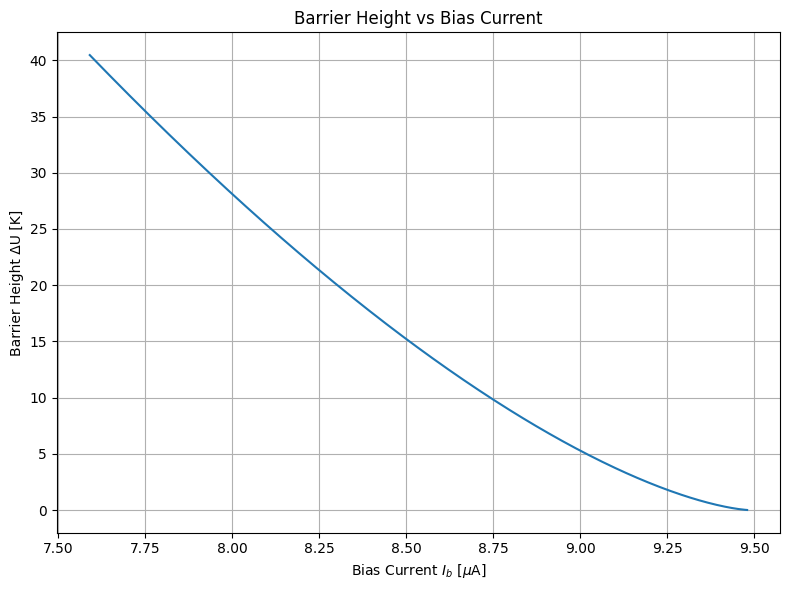

In [ ]:
Ib_vals = np.linspace(0.8 * Ic0, 0.999 * Ic0, 300)
DU_vals = [deltaU(Ib, Ic0)/kB for Ib in Ib_vals]

plt.figure(figsize=(8,6))
plt.plot(Ib_vals * 1e6, DU_vals)
plt.xlabel("Bias Current $I_b$ [$\\mu$A]")
plt.ylabel("Barrier Height ΔU [K]")
plt.title("Barrier Height vs Bias Current")
plt.grid(True)
plt.tight_layout()
plt.show()

##  Crossover Temperature $( T^* )$ vs Critical Current and Capacitance

This plot shows how the **crossover temperature** $( T^* )$—the temperature below which **quantum tunneling** dominates over **thermal activation**—depends on the **critical current** $( I_c )$ and **junction capacitance** \( C \) of a Josephson junction.

---

###  Formula

The crossover temperature is defined as:

$$
T^* = \frac{\hbar \omega_p}{2\pi k_B}
$$

where the **plasma frequency** \( \omega_p \) is given by:

$$
\omega_p = \sqrt{\frac{2\pi I_c}{\Phi_0\, C}}
$$

Substituting for \( \omega_p \) gives:

$$
T^*(I_c, C) = \frac{\hbar}{2\pi k_B}
\sqrt{\frac{2\pi I_c}{\Phi_0\, C}}
$$

---

###  Physical Interpretation

- $( T^* )$ marks the **quantum-to-classical crossover** temperature:
  - For $( T > T^* )$, **thermal activation** dominates.
  - For $( T < T^* )$, **macroscopic quantum tunneling (MQT)** dominates.

---

###  Observations from the Plot

- **Higher critical current** $( I_c )$ → **higher $( T^* )$**  
  → Stronger supercurrent increases the plasma frequency \( \omega_p \), allowing **quantum effects** to persist at **higher temperatures**.

- **Larger capacitance** \( C \) → **lower $( T^* )$**  
  → Greater effective “mass” of the phase particle reduces \( \omega_p \), pushing the quantum regime to **lower temperatures**.

- The **color map** (or contour plot) typically shows regions of:
  - **High $( I_c )$, low ( C \)** → large $( T^* )$: *quantum-dominated regime*.  
  - **Low $( I_c )$, high \( C \)** → small $( T^* )$: *classical (thermal) regime*.

---

 *Thus, the interplay between $( I_c )$ and \( C \) fundamentally controls the onset of quantum behavior in Josephson junctions. Designing junctions with higher critical currents and smaller capacitances extends the operational range of quantum phenomena to higher temperatures.*


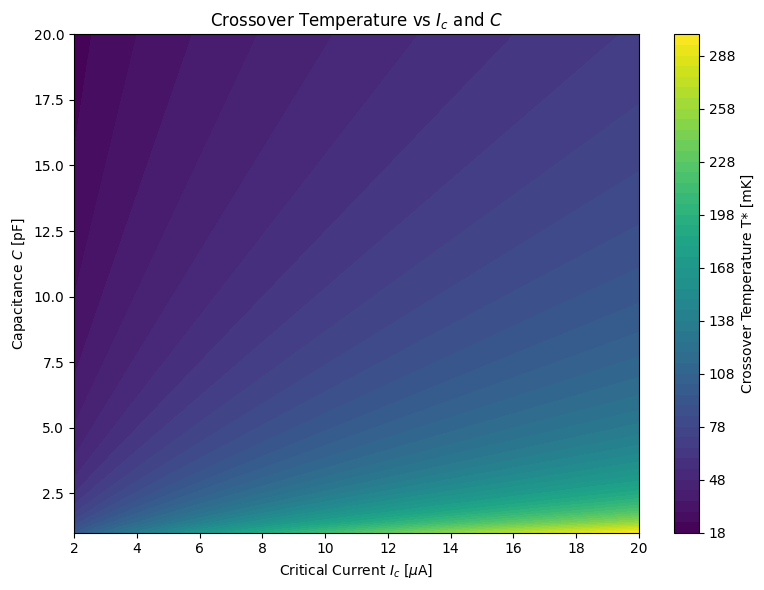

In [ ]:
Ic_range = np.linspace(2e-6, 20e-6, 50)
C_range = np.linspace(1e-12, 20e-12, 50)
Ic_grid, C_grid = np.meshgrid(Ic_range, C_range)
wp_grid = np.sqrt(2 * np.pi * Ic_grid / (C_grid * Phi0))
T_star_grid = hbar * wp_grid / (2 * np.pi * kB)

plt.figure(figsize=(8,6))
plt.contourf(Ic_grid*1e6, C_grid*1e12, T_star_grid*1e3, levels=50, cmap='viridis')
cbar = plt.colorbar(label="Crossover Temperature T* [mK]")
plt.xlabel("Critical Current $I_c$ [$\\mu$A]")
plt.ylabel("Capacitance $C$ [pF]")
plt.title("Crossover Temperature vs $I_c$ and $C$")
plt.tight_layout()
plt.show()

##  Average Escape Time of the Phase Particle

The **average escape time** $( \tau )$ characterizes how long the **phase particle** remains trapped in a potential well before escaping — either by **thermal activation** or **quantum tunneling**.

It is given by the **inverse of the total escape rate**:

$$
\tau(I_b, T) = \frac{1}{\gamma_{\mathrm{th}}(I_b, T) + \gamma_{\mathrm{q}}(I_b)}
$$

---

###  Thermal Activation Rate

The **thermal activation rate** (Kramers escape rate) is:

$$
\gamma_{\mathrm{th}} = \frac{\omega_p}{2\pi}
\exp\!\left(-\frac{\Delta U}{k_B T}\right)
$$

where  
- $( \omega_p ) $— plasma frequency  
- $( \Delta U )$ — potential energy barrier  
- $( k_B ) $— Boltzmann constant  
- $( T ) $— temperature  

---

###  Quantum Tunneling Rate

At sufficiently low temperatures, the **macroscopic quantum tunneling (MQT)** rate dominates:

$$
\gamma_{\mathrm{q}} =
\frac{\omega_p}{2\pi}
\sqrt{\frac{864\pi\,\Delta U}{\hbar \omega_p}}
\exp\!\left(-\frac{36\,\Delta U}{5\,\hbar \omega_p}\right)
$$

where  
- $( \hbar )$ — reduced Planck constant  

---

##  Observations from the Plot

The **escape time** $( \tau )$ is plotted versus the **bias current** $( I_b )$ at a fixed low temperature (e.g., **20 mK**).

- At **low bias currents**, the barrier $( \Delta U )$ is **large**, so escape rates are **exponentially suppressed** →  
  escape times can reach **astronomical values** (up to $(10^{58}) s$).  
- As $( I_b )$ increases, the barrier becomes **shallower**, leading to a **rapid drop** in escape time — sometimes below 1 s.  
- This behavior reflects both **thermal activation** and **quantum tunneling** dynamics.  
- The curve captures the **stability of the zero-voltage state** in a Josephson junction, where small changes in bias current cause **huge variations** in lifetime.

---

 *Thus, $( \tau(I_b, T) )$ provides a powerful measure of the junction’s metastability and helps distinguish between quantum and classical escape regimes.*


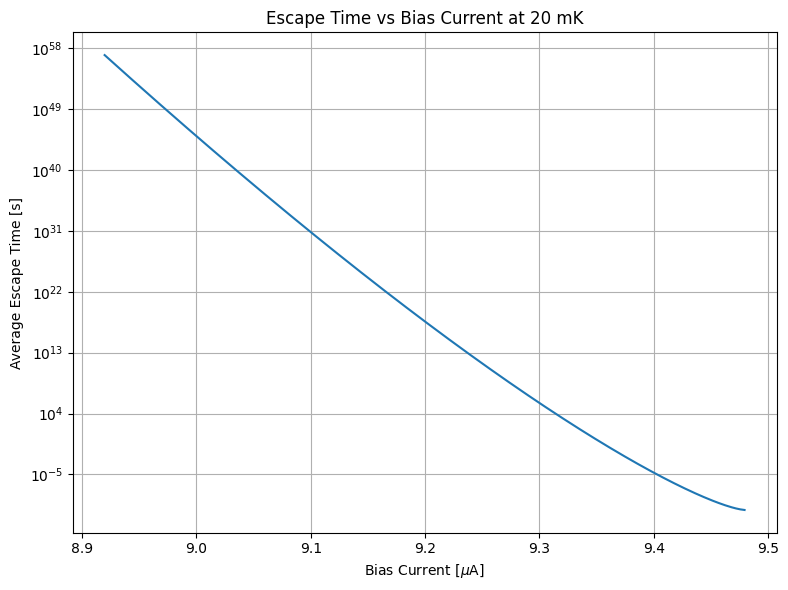

In [ ]:

def plot_escape_time():
    Ibs = np.linspace(0.94 * Ic0, 0.999 * Ic0, 300)
    T = 0.02  # Kelvin
    taus = [1/(gamma_th(Ib, T, Ic0) + gamma_q(Ib, Ic0)) for Ib in Ibs]
    plt.figure(figsize=(8,6))
    plt.plot(Ibs*1e6, taus, label="Escape Time [s]")
    plt.xlabel("Bias Current [$\\mu$A]")
    plt.ylabel("Average Escape Time [s]")
    plt.title("Escape Time vs Bias Current at 20 mK")
    plt.yscale("log")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

plot_escape_time()


### Escape time vs Bias current at high temperature

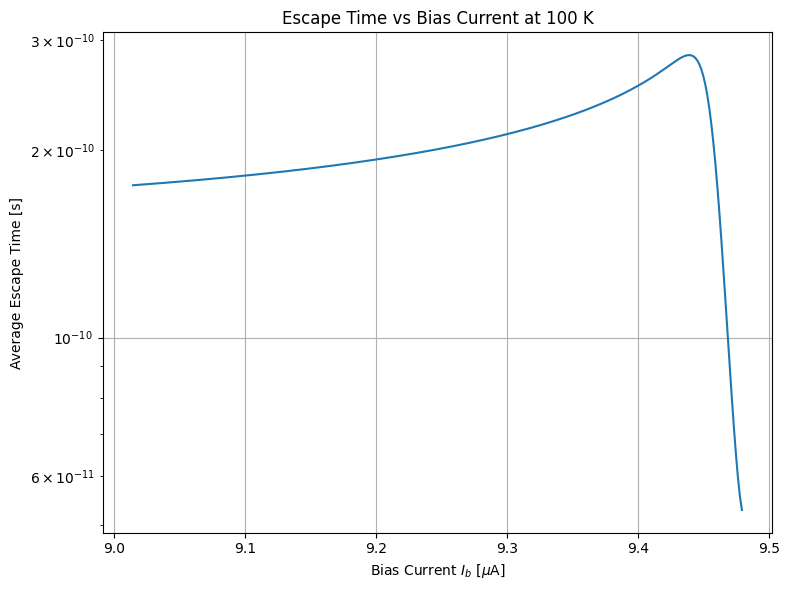

In [ ]:
Ib_vals = np.linspace(0.95 * Ic0, 0.999 * Ic0, 300)
T = 100  # Kelvin
escape_time = [1 / (gamma_th(Ib, T, Ic0) + gamma_q(Ib, Ic0)) for Ib in Ib_vals]

plt.figure(figsize=(8,6))
plt.plot(Ib_vals * 1e6, np.array(escape_time))
plt.xlabel("Bias Current $I_b$ [$\\mu$A]")
plt.ylabel("Average Escape Time [s]")
plt.title("Escape Time vs Bias Current at 100 K")
plt.yscale("log")
plt.grid(True)
plt.tight_layout()
plt.show()